# WINE SEGMENTATION

perform statistical analysis on the clusters highlighting key findings and making recommendations on business decisions based on your findings

In [28]:
## Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings.filterwarnings('ignore')
sns.set()
#from pandas_profiling import ProfileReport

## Data Importation

In [2]:

wine_data = pd.read_csv('alcohols.csv')
wine_data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
wine_data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [4]:
wine_data.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

## Data Cleaning

Dealing with ourliers

In [5]:
column_list =  wine_data.columns.tolist()

In [6]:
column_list

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

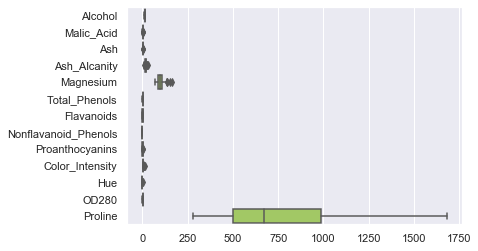

In [7]:
ax = sns.boxplot(data = wine_data ,orient = "h", palette = "Set2")

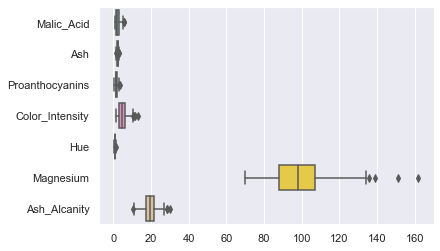

In [8]:
ax = sns.boxplot(data=wine_data[['Malic_Acid','Ash','Proanthocyanins','Color_Intensity', 'Hue','Magnesium', 'Ash_Alcanity']], orient="h", palette="Set2")

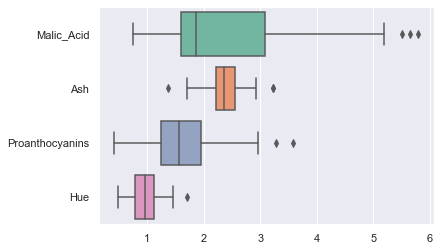

In [9]:
ax = sns.boxplot(data=wine_data[[
            'Malic_Acid',
            'Ash',
            'Proanthocyanins',
            'Hue',]]
         ,orient="h", palette="Set2")

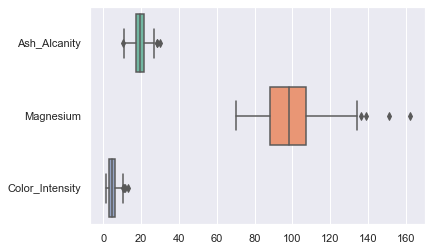

In [10]:
ax = sns.boxplot(data=wine_data[[
             'Ash_Alcanity',
             'Magnesium',
             'Color_Intensity']]
            , orient="h", palette="Set2")

In [11]:
#Run twice
for i in ['Proanthocyanins', 'Hue','Magnesium']:
    q1 = np.percentile(wine_data[i],25)
    q3 = np.percentile(wine_data[i],75)

    iqr = q3-q1
    min_amount = q1 - 1.5*iqr
    max_amount = q3 + 1.5*iqr

    wine_data[i][wine_data[i]>max_amount]=wine_data[i].median()
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
for i in ['Ash','Ash_Alcanity']:
    q1 = np.percentile(wine_data[i],25)
    q3 = np.percentile(wine_data[i],75)

    iqr = q3-q1
    min_amount = q1 - 1.5*iqr
    max_amount = q3 + 1.5*iqr

    wine_data[i][wine_data[i]>max_amount]=wine_data[i].median()
    wine_data[i][wine_data[i]<min_amount]=wine_data[i].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


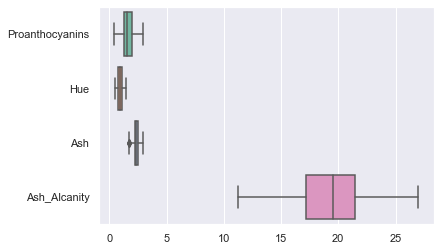

In [13]:
ax = sns.boxplot(data=wine_data[['Proanthocyanins', 'Hue','Ash','Ash_Alcanity']]
            , orient="h", palette="Set2")

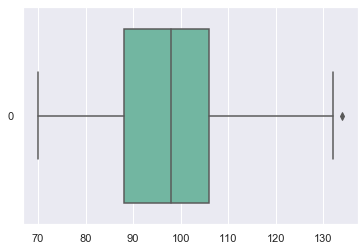

In [14]:
ax = sns.boxplot(data=wine_data['Magnesium']
            , orient="h", palette="Set2")

In [15]:
#Run 5 times
q1 = np.percentile(wine_data['Color_Intensity'],25)
q3 = np.percentile(wine_data['Color_Intensity'],75)

iqr = q3-q1
min_amount = q1 - 1.5*iqr
max_amount = q3 + 1.5*iqr

wine_data['Color_Intensity'][wine_data['Color_Intensity']>max_amount]=wine_data['Color_Intensity'].median()
wine_data['Color_Intensity'][wine_data['Color_Intensity']<min_amount]=wine_data['Color_Intensity'].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


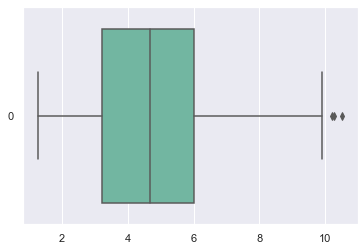

In [16]:
ax = sns.boxplot(data=wine_data['Color_Intensity']
            , orient="h", palette="Set2")

In [17]:
q1 = np.percentile(wine_data['Malic_Acid'],25)
q3 = np.percentile(wine_data['Malic_Acid'],75)

iqr = q3-q1
min_amount = q1 - 1.5*iqr
max_amount = q3 + 1.5*iqr

wine_data['Malic_Acid'][wine_data['Malic_Acid']>max_amount]=wine_data['Malic_Acid'].median()
wine_data['Malic_Acid'][wine_data['Malic_Acid']<min_amount]=wine_data['Malic_Acid'].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


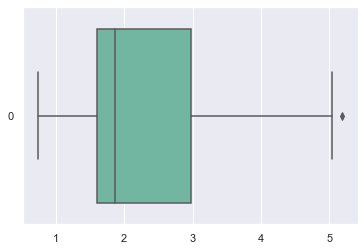

In [18]:
ax = sns.boxplot(data=wine_data['Malic_Acid']
            , orient="h", palette="Set2")

## Data Preparation

In [19]:
# standardize the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
winedata_std = sc.fit_transform(wine_data)

## Clustering the Dataset

We will use the elbow method to find the number of clusters we will use for segmentation

In [71]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 60, init = 'k-means++')
    kmeans.fit(winedata_std)
    wcss.append(kmeans.inertia_)


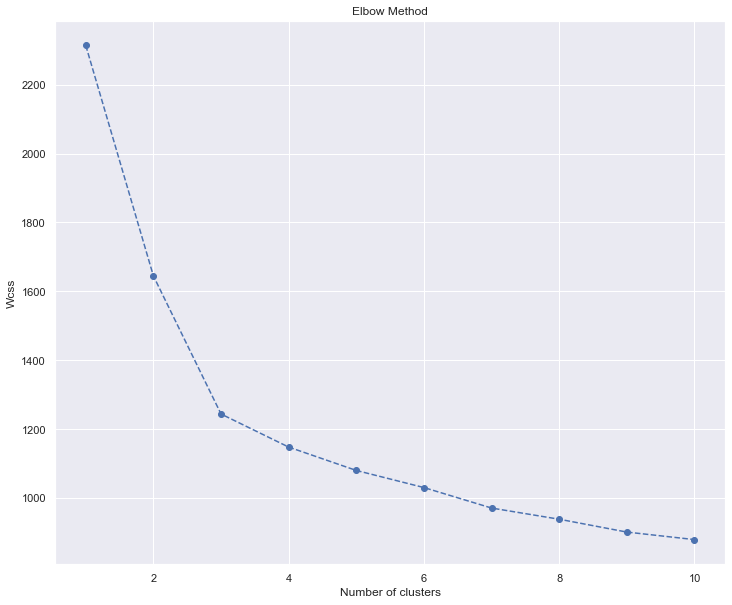

In [72]:
plt.figure(figsize= (12,10))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.title('Elbow Method')
plt.show()


## Hierachical Clustering

the optimal number of clusters is 3 using the elbow method

## Finding the number of clusters using the dendrogram method

Euclidean Distance..straight line between points

Manhattan distance...change in x and change in y between points

Maximum distance...horizontal, change in x

To divide the clusters, we need to find a horizontal line on the dendogram on which to cut

Rule of thumb:Find the longest vertical line unintercepted by a horizontal line from the dendogram so as to make the cut

Use Hierarchical clustering to determine the number of clusters and flat clustering for segmentation

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
hier_clust= linkage(winedata_std, method = 'ward')

plt.figure(figsize=(12,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p=5,
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

Through the above method, I determine the optimum number of clusters to be 3 since the longest line is between 30 and 15 and touches the 3rd level

## Data Modelling

In [82]:
## fitting our standardized dataset into the model
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 60)
kmeans.fit(winedata_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=60, tol=0.0001, verbose=0)

In [83]:
df_seg_kmeans = wine_data.copy()
df_seg_kmeans['segment k-means'] = kmeans.labels_

In [84]:
df_seg_analysis = df_seg_kmeans.groupby(['segment k-means']). mean()
df_seg_analysis

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
segment k-means                                                              
0                13.696557    2.005738  2.442295     17.118033  106.409836   
1                13.134118    3.161569  2.417647     21.241176   98.666667   
2                12.254242    1.832045  2.245909     20.045455   91.439394   

                 Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
segment k-means                                                    
0                     2.853279    3.015246              0.291639   
1                     1.683922    0.818824              0.451961   
2                     2.251515    2.053333              0.357121   

                 Proanthocyanins  Color_Intensity       Hue     OD280  \
segment k-means                                                         
0                       1.899836         5.500328  1.063934  3.172131   
1                       1.145882         6.696078  0.691961  1.696667   
2                       1.592424         2.967424  1.052894  2.800758   

                     Proline  
segment k-means               
0                1102.901639  
1                 619.058824  
2                 516.636364

## Model Evaluation

### Findings

Segment 1: Highest in Alcohol, Ash, Magnesium, Total_Phenols, Flavanoids, Proanthocyanins, Hue, OD280 and proline
Segment 2: Highest in Malic_Acid, Ash_Alcanity, Nonflavanoid_Phenols, Color_Intensity
Segment 3: 2nd in Hue and 0D280

Segment 1: Best_Quality
Segment 2: Standard_n_Colored
Segment 3: Sub-standard

In [85]:
df_seg_analysis['N Obs'] = df_seg_kmeans[['segment k-means','Alcohol']].groupby(['segment k-means']).count()
#in order to count each column in a row, a second argument is required

In [86]:
df_seg_analysis['Prop Obs'] = df_seg_analysis['N Obs']/df_seg_analysis['N Obs'].sum()
df_seg_analysis
#Proportions

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
segment k-means                                                              
0                13.696557    2.005738  2.442295     17.118033  106.409836   
1                13.134118    3.161569  2.417647     21.241176   98.666667   
2                12.254242    1.832045  2.245909     20.045455   91.439394   

                 Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
segment k-means                                                    
0                     2.853279    3.015246              0.291639   
1                     1.683922    0.818824              0.451961   
2                     2.251515    2.053333              0.357121   

                 Proanthocyanins  Color_Intensity       Hue     OD280  \
segment k-means                                                         
0                       1.899836         5.500328  1.063934  3.172131   
1                       1.145882         6.696078  0.691961  1.696667   
2                       1.592424         2.967424  1.052894  2.800758   

                     Proline  N Obs  Prop Obs  
segment k-means                                
0                1102.901639     61  0.342697  
1                 619.058824     51  0.286517  
2                 516.636364     66  0.370787

In [87]:
df_seg_kmeans[:][df_seg_kmeans['segment k-means']==0]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
5      14.20        1.76  2.45          15.2        112           3.27   
6      14.39        1.87  2.45          14.6         96           2.50   
7      14.06        2.15  2.61          17.6        121           2.60   
8      14.83        1.64  2.17          14.0         97           2.80   
9      13.86        1.35  2.27          16.0         98           2.98   
10     14.10        2.16  2.30          18.0        105           2.95   
11     14.12        1.48  2.32          16.8         95           2.20   
12     13.75        1.73  2.41          16.0         89           2.60   
13     14.75        1.73  2.39          11.4         91           3.10   
14     14.38        1.87  2.38          12.0        102           3.30   
15     13.63        1.81  2.70          17.2        112           2.85   
16     14.30        1.92  2.72          20.0        120           2.80   
17     13.83        1.57  2.62          20.0        115           2.95   
18     14.19        1.59  2.48          16.5        108           3.30   
19     13.64        3.10  2.56          15.2        116           2.70   
20     14.06        1.63  2.28          16.0        126           3.00   
21     12.93        3.80  2.65          18.6        102           2.41   
22     13.71        1.86  2.36          16.6        101           2.61   
23     12.85        1.60  2.52          17.8         95           2.48   
24     13.50        1.81  2.61          20.0         96           2.53   
25     13.05        2.05  2.36          25.0        124           2.63   
26     13.39        1.77  2.62          16.1         93           2.85   
27     13.30        1.72  2.14          17.0         94           2.40   
28     13.87        1.90  2.80          19.4        107           2.95   
29     14.02        1.68  2.21          16.0         96           2.65   
..       ...         ...   ...           ...        ...            ...   
31     13.58        1.66  2.36          19.1        106           2.86   
32     13.68        1.83  2.36          17.2        104           2.42   
33     13.76        1.53  2.70          19.5        132           2.95   
34     13.51        1.80  2.65          19.0        110           2.35   
35     13.48        1.81  2.41          20.5        100           2.70   
36     13.28        1.64  2.84          15.5        110           2.60   
37     13.05        1.65  2.55          18.0         98           2.45   
38     13.07        1.50  2.10          15.5         98           2.40   
39     14.22        3.99  2.51          13.2        128           3.00   
40     13.56        1.71  2.31          16.2        117           3.15   
41     13.41        3.84  2.12          18.8         90           2.45   
42     13.88        1.89  2.59          15.0        101           3.25   
43     13.24        3.98  2.29          17.5        103           2.64   
44     13.05        1.77  2.10          17.0        107           3.00   
45     14.21        4.04  2.44          18.9        111           2.85   
46     14.38        3.59  2.28          16.0        102           3.25   
47     13.90        1.68  2.12          16.0        101           3.10   
48     14.10        2.02  2.40          18.8        103           2.75   
49     13.94        1.73  2.27          17.4        108           2.88   
50     13.05        1.73  2.04          12.4         92           2.72   
51     13.83        1.65  2.60          17.2         94           2.45   
52     13.82        1.75  2.42          14.0        111           3.88   
53     13

In [88]:
df_seg_kmeans[:][df_seg_kmeans['segment k-means']==1]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
61     12.64       1.360  2.02          16.8        100           2.02   
83     13.05       3.860  2.32          22.5         85           1.65   
118    12.77       3.430  1.98          16.0         80           1.63   
130    12.86       1.350  2.32          18.0        122           1.51   
131    12.88       2.990  2.40          20.0        104           1.30   
132    12.81       2.310  2.40          24.0         98           1.15   
133    12.70       3.550  2.36          21.5        106           1.70   
134    12.51       1.240  2.25          17.5         85           2.00   
135    12.60       2.460  2.20          18.5         94           1.62   
136    12.25       4.720  2.54          21.0         89           1.38   
137    12.53       1.865  2.64          25.0         96           1.79   
138    13.49       3.590  2.19          19.5         88           1.62   
139    12.84       2.960  2.61          24.0        101           2.32   
140    12.93       2.810  2.70          21.0         96           1.54   
141    13.36       2.560  2.35          20.0         89           1.40   
142    13.52       3.170  2.72          23.5         97           1.55   
143    13.62       4.950  2.35          20.0         92           2.00   
144    12.25       3.880  2.20          18.5        112           1.38   
145    13.16       3.570  2.15          21.0        102           1.50   
146    13.88       5.040  2.23          20.0         80           0.98   
147    12.87       4.610  2.48          21.5         86           1.70   
148    13.32       3.240  2.38          21.5         92           1.93   
149    13.08       3.900  2.36          21.5        113           1.41   
150    13.50       3.120  2.62          24.0        123           1.40   
151    12.79       2.670  2.48          22.0        112           1.48   
152    13.11       1.900  2.75          25.5        116           2.20   
153    13.23       3.300  2.28          18.5         98           1.80   
154    12.58       1.290  2.10          20.0        103           1.48   
155    13.17       5.190  2.32          22.0         93           1.74   
156    13.84       4.120  2.38          19.5         89           1.80   
157    12.45       3.030  2.64          27.0         97           1.90   
158    14.34       1.680  2.70          25.0         98           2.80   
159    13.48       1.670  2.64          22.5         89           2.60   
160    12.36       3.830  2.38          21.0         88           2.30   
161    13.69       3.260  2.54          20.0        107           1.83   
162    12.85       3.270  2.58          22.0        106           1.65   
163    12.96       3.450  2.35          18.5        106           1.39   
164    13.78       2.760  2.30          22.0         90           1.35   
165    13.73       4.360  2.26          22.5         88           1.28   
166    13.45       3.700  2.60          23.0        111           1.70   
167    12.82       3.370  2.30          19.5         88           1.48   
168    13.58       2.580  2.69          24.5        105           1.55   
169    13.40       4.600  2.86          25.0        112           1.98   
170    12.20       3.030  2.32          19.0         96           1.25   
171    12.77       2.390  2.28          19.5         86           1.39   
172    14.16       2.510  2.48          20.0         91           1.68   
173    13.71       1.865  2.45          20.5         95           1.68   
174    13.40       3.910  2.48          23.0        102           1.80   
175    13.27       4.280  2.26          20.0        120           1.59   
176    13.17       2.590  2.37          20.0        120           1.65   
177    14.13       4.100  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
61         1.41                  0.53             0.62         5.750000  0.

In [52]:
df_seg_kmeans[:][df_seg_kmeans['segment k-means']==2]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
61     12.64       1.360  2.02          16.8        100           2.02   
83     13.05       3.860  2.32          22.5         85           1.65   
118    12.77       3.430  1.98          16.0         80           1.63   
130    12.86       1.350  2.32          18.0        122           1.51   
131    12.88       2.990  2.40          20.0        104           1.30   
132    12.81       2.310  2.40          24.0         98           1.15   
133    12.70       3.550  2.36          21.5        106           1.70   
134    12.51       1.240  2.25          17.5         85           2.00   
135    12.60       2.460  2.20          18.5         94           1.62   
136    12.25       4.720  2.54          21.0         89           1.38   
137    12.53       1.865  2.64          25.0         96           1.79   
138    13.49       3.590  2.19          19.5         88           1.62   
139    12.84       2.960  2.61          24.0        101           2.32   
140    12.93       2.810  2.70          21.0         96           1.54   
141    13.36       2.560  2.35          20.0         89           1.40   
142    13.52       3.170  2.72          23.5         97           1.55   
143    13.62       4.950  2.35          20.0         92           2.00   
144    12.25       3.880  2.20          18.5        112           1.38   
145    13.16       3.570  2.15          21.0        102           1.50   
146    13.88       5.040  2.23          20.0         80           0.98   
147    12.87       4.610  2.48          21.5         86           1.70   
148    13.32       3.240  2.38          21.5         92           1.93   
149    13.08       3.900  2.36          21.5        113           1.41   
150    13.50       3.120  2.62          24.0        123           1.40   
151    12.79       2.670  2.48          22.0        112           1.48   
152    13.11       1.900  2.75          25.5        116           2.20   
153    13.23       3.300  2.28          18.5         98           1.80   
154    12.58       1.290  2.10          20.0        103           1.48   
155    13.17       5.190  2.32          22.0         93           1.74   
156    13.84       4.120  2.38          19.5         89           1.80   
157    12.45       3.030  2.64          27.0         97           1.90   
158    14.34       1.680  2.70          25.0         98           2.80   
159    13.48       1.670  2.64          22.5         89           2.60   
160    12.36       3.830  2.38          21.0         88           2.30   
161    13.69       3.260  2.54          20.0        107           1.83   
162    12.85       3.270  2.58          22.0        106           1.65   
163    12.96       3.450  2.35          18.5        106           1.39   
164    13.78       2.760  2.30          22.0         90           1.35   
165    13.73       4.360  2.26          22.5         88           1.28   
166    13.45       3.700  2.60          23.0        111           1.70   
167    12.82       3.370  2.30          19.5         88           1.48   
168    13.58       2.580  2.69          24.5        105           1.55   
169    13.40       4.600  2.86          25.0        112           1.98   
170    12.20       3.030  2.32          19.0         96           1.25   
171    12.77       2.390  2.28          19.5         86           1.39   
172    14.16       2.510  2.48          20.0         91           1.68   
173    13.71       1.865  2.45          20.5         95           1.68   
174    13.40       3.910  2.48          23.0        102           1.80   
175    13.27       4.280  2.26          20.0        120           1.59   
176    13.17       2.590  2.37          20.0        120           1.65   
177    14.13       4.100  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
61         1.41                  0.53             0.62         5.750000  0.

In [93]:
df_seg_analysis.rename({0:'Best_Quality',
                     1:'Standard_and_Colored',
                     2:'Sub-standard'})

Alcohol  Malic_Acid       Ash  Ash_Alcanity  \
segment k-means                                                       
Best_Quality          13.696557    2.005738  2.442295     17.118033   
Standard_and_Colored  13.134118    3.161569  2.417647     21.241176   
Sub-standard          12.254242    1.832045  2.245909     20.045455   

                       Magnesium  Total_Phenols  Flavanoids  \
segment k-means                                               
Best_Quality          106.409836       2.853279    3.015246   
Standard_and_Colored   98.666667       1.683922    0.818824   
Sub-standard           91.439394       2.251515    2.053333   

                      Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
segment k-means                                                                
Best_Quality                      0.291639         1.899836         5.500328   
Standard_and_Colored              0.451961         1.145882         6.696078   
Sub-standard                      0.357121         1.592424         2.967424   

                           Hue     OD280      Proline  N Obs  Prop Obs  
segment k-means                                                         
Best_Quality          1.063934  3.172131  1102.901639     61  0.342697  
Standard_and_Colored  0.691961  1.696667   619.058824     51  0.286517  
Sub-standard          1.052894  2.800758   516.636364     66  0.370787

In [94]:
df_seg_kmeans['Labels'] = df_seg_kmeans['segment k-means'].map({0:'Best_Quality',
                     1:'Standard_and_Colored',
                     2:'Sub-standard'})

## Comparing Proline and Alchohol

<function matplotlib.pyplot.show(*args, **kw)>

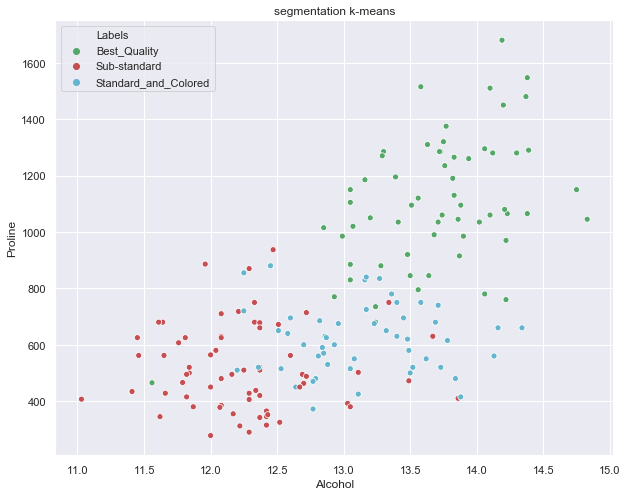

In [99]:
x_label = df_seg_kmeans['Alcohol']
y_label = df_seg_kmeans['Proline']
plt.figure(figsize = (10,8))
sns.scatterplot(x_label, y_label, hue = df_seg_kmeans['Labels'], palette =['g','r','c'])
plt.title('segmentation k-means')
plt.show